2000000


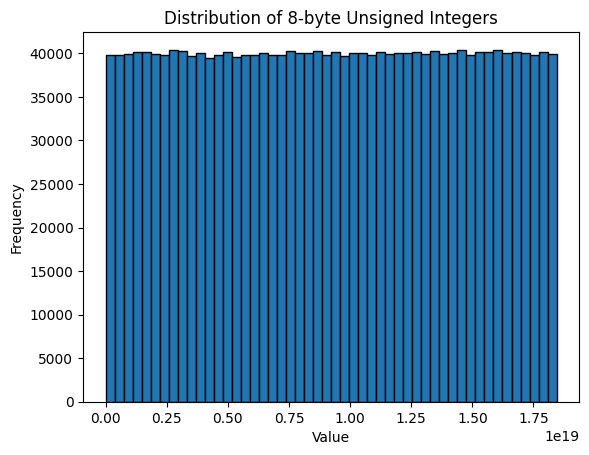

1000000


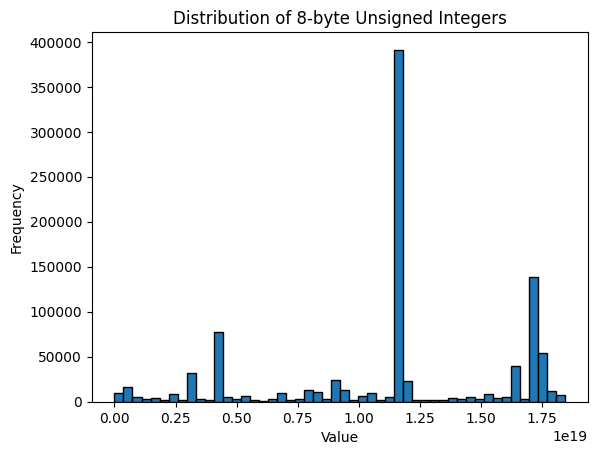

Value               
11481450842728068666    382716
17080844252411086396    135192
4097899892109951731      74360
17684690309361791047     47845
16511932262821357796     34283
                         ...  
2547177364644454124          1
2453920709632316             1
2545751967024036350          1
2545667503027543812          1
9211084508052315557          1
Name: count, Length: 13886, dtype: int64
1000000


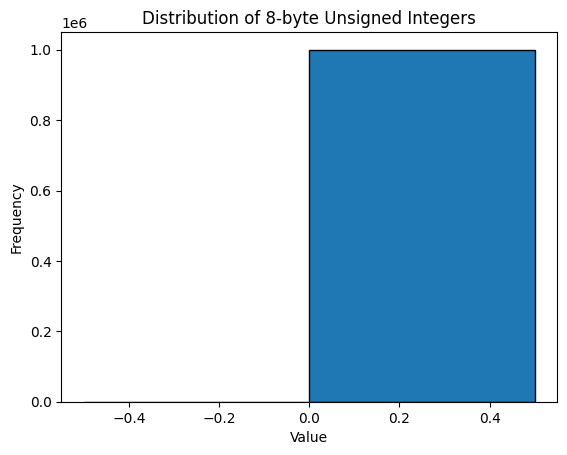

Value
0        999999
Name: count, dtype: int64


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the binary file
key_file_path = '/home/chesetti/Repos/arqf/arqf/workload_adaptivity_small/kuniform/keys'
left_file_path = '/home/chesetti/Repos/arqf/arqf/workload_adaptivity_small/kuniform/0_qzipfian_trial_0/left'
results_file_path = '/home/chesetti/Repos/arqf/arqf/workload_adaptivity_small/kuniform/10_qzipfian_trial_9/result'

def keys_and_plot_dist(file_path, bins=50, size_bytes=8):
    # Read the binary file into a numpy array for faster processing
    with open(file_path, 'rb') as file:
        # Read the first 8 bytes to get the number of keys
        num_keys_bytes = file.read(size_bytes)
        if (size_bytes == 4):
            num_keys = np.frombuffer(num_keys_bytes, dtype=np.uint32)[0]
        else:
            num_keys = np.frombuffer(num_keys_bytes, dtype=np.uint64)[0]
        print(num_keys)
        
        # Read the remaining bytes as 8-byte unsigned integers (np.uint64)
        if (size_bytes == 4):
            data = np.frombuffer(file.read(int(num_keys * size_bytes)), dtype=np.uint32, offset=size_bytes)
        else:
            data = np.frombuffer(file.read(int(num_keys * size_bytes)), dtype=np.uint64, offset=size_bytes)

    # Convert the numpy array to a pandas DataFrame for further analysis (if needed)
    df = pd.DataFrame(data, columns=['Value'])

    # Plot the distribution of the integers using pandas plotting functionality
    df['Value'].plot(kind='hist', bins=bins, edgecolor='black', title='Distribution of 8-byte Unsigned Integers')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    return df

keys = keys_and_plot_dist(key_file_path)
left = keys_and_plot_dist(left_file_path)
print(left.value_counts())

result = keys_and_plot_dist(results_file_path, bins=2, size_bytes=4)
print(result.value_counts().sort_index())